# Oblig 2 - DAVE 3625

Pål André Holdahl (s147098)

Leif Esten Grimstad Kielland (s362057)

Ingrid Lunde (s338231)

# Tesla stock price predictor



## The assignment
Predict stock market price for TESLA.

I want you to make a prediction algorithm which predicts the price of this stock on a specific date.

Input will be date and output should be price of that stock (close value in the data file).

You should also show the prediction percentage score.

Data file: TESLA.csv For updated csv file, please download the data from: https://finance.yahoo.com/quote/TSLA/history?p=TSLA


## Importing Libraries

In [1]:
# Importing the libraries I think I will need
import numpy as np                                      # For mathematical calculations
import matplotlib.pyplot as plt                         # For plotting graphs
import matplotlib.dates as mdates                       # For formatting dates
import pandas as pd                                     # For data manipulation
import seaborn as sns                                   # For plotting graphs
from sklearn.linear_model import LinearRegression       # For linear regression
from sklearn.model_selection import train_test_split    # For splitting data into training and test sets
from sklearn.preprocessing import StandardScaler        # For scaling data

%matplotlib inline

## Preparing the data

In [2]:
# Getting the data for Tesla stock
tesla_df = pd.read_csv('TSLA.csv')                      # Reading the data from the csv file, using the Date column as index

tesla_df.head()                                         # Printing the first 5 rows of the dataframe

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [3]:
# Checking the data types of the columns and if there is any null values
tesla_df.info()                                         # Printing the info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3358 entries, 0 to 3357
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3358 non-null   object 
 1   Open       3358 non-null   float64
 2   High       3358 non-null   float64
 3   Low        3358 non-null   float64
 4   Close      3358 non-null   float64
 5   Adj Close  3358 non-null   float64
 6   Volume     3358 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 183.8+ KB


In [4]:
# Checking for duplicate values
duplicates = tesla_df.duplicated()                      # Checking for duplicates

print(duplicates.sum())                                 # Printing the result

0


In [5]:
# Checking for outliers
tesla_df.describe()                                     # Printing the summary statistics of the dataframe

,Open,High,Low,Close,Adj Close,Volume
count,3358.000000,3358.000000,3358.000000,3358.000000,3358.000000,3.358000e+03
mean,68.414195,69.934683,66.775009,68.389271,68.389271,9.651449e+07
std,100.449599,102.712914,97.955889,100.362548,100.362548,8.047428e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,10.197500,10.507333,9.935000,10.163000,10.163000,4.550400e+07
50%,16.803667,17.049667,16.566668,16.812333,16.812333,8.046615e+07
75%,67.503168,71.509165,66.761002,71.074669,71.074669,1.231710e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


<Axes: >

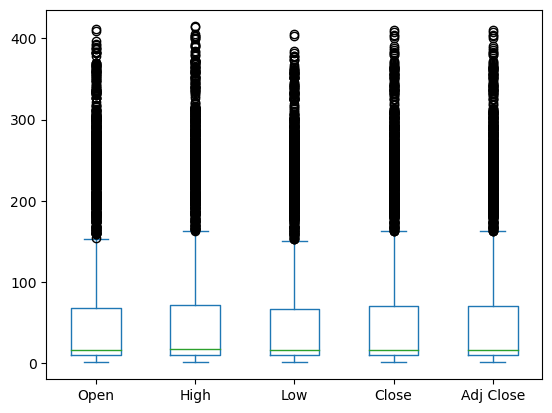

In [6]:
# Using a boxplot to visualize the outliers
tesla_df[['Open','High','Low','Close','Adj Close']].plot(kind='box')

### Results
- There are 3358 rows.
- info() is clearly showing a count of 3358 non-null entries for each column, indicating that there are no null values in the dataframe.
- Checking for duplicates shows us that there are no duplicate values in the dataframe.
- The boxplot tells us that there are allot of outliers, or that majority of the data might be irrelevant for prediction.

We might be better off cutting the first part of the data, to get conzise predictions for todays market.

I am also observing that the Date column is of Dtype object.

In [7]:
# Date is of an object type, need it to be of type datetime
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])     # Converting the Date column to datetime format

tesla_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


### Plotting the whole dataframe to get a vizual represantation of our data

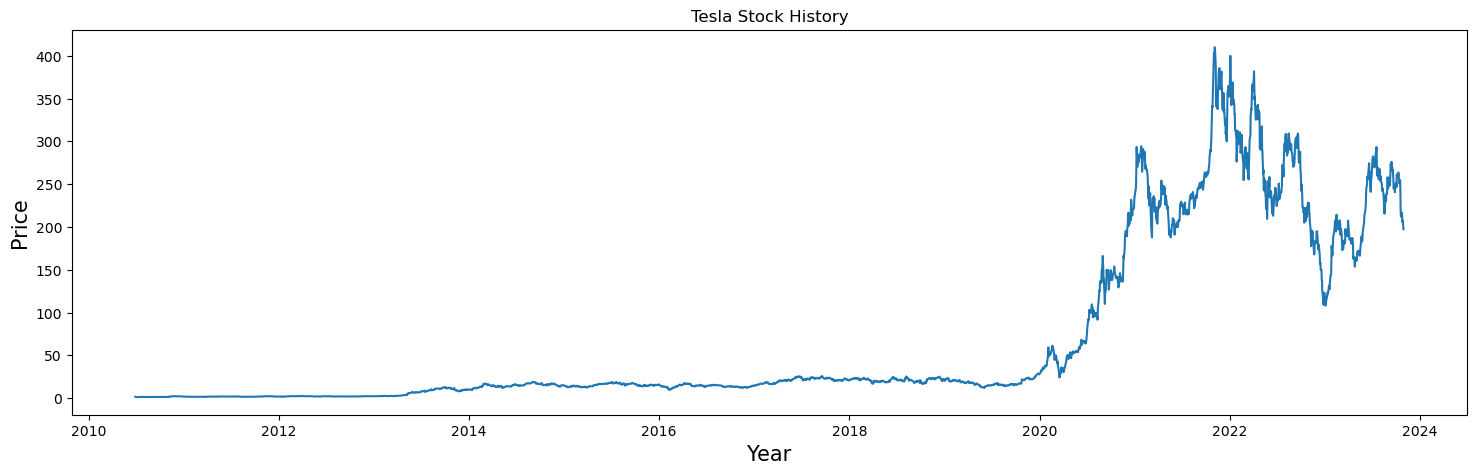

In [8]:
# Plotting all the data with years on the x-axis and price on the y-axis
plt.figure(figsize=(18,5))                          # Setting the size of the plot
plt.title('Tesla Stock History')                    # Title of the plot
plt.plot(tesla_df['Date'], tesla_df['Close'])       # Plotting the data (Closing price is what we want)
plt.xlabel('Year', fontsize=15)                     # Label on the x-axis
plt.ylabel('Price', fontsize=15)                    # Label on the y-axis
plt.show()                                          # Showing the plot


### Analyzing the graph

As we can see from the graph, the movement in the stock market from about year 2020 and upwards is a completely different story from the rest of the data.

This fits well with the boxplot done earlier with all the outliers.

Based on this I suggest that it's better to not use the data from before year 2020, as the data from 2020 untill today seems more relevant.

In [9]:
# Getting the relevant data:
tesla_df = tesla_df[tesla_df['Date'].dt.year >= 2020]       # Getting the data from 2020 and onwards

tesla_df.head()                                             # Printing the first 5 rows of the dataframe

,Date,Open,High,Low,Close,Adj Close,Volume
2394,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2395,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2396,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2397,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2398,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


<Axes: >

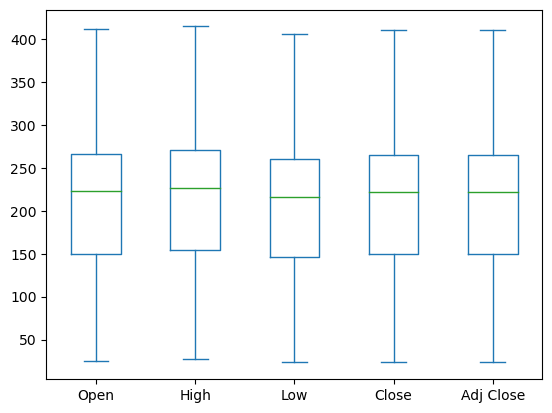

In [10]:
# Doing a boxplot to check for outliers
tesla_df[['Open','High','Low','Close','Adj Close']].plot(kind='box')

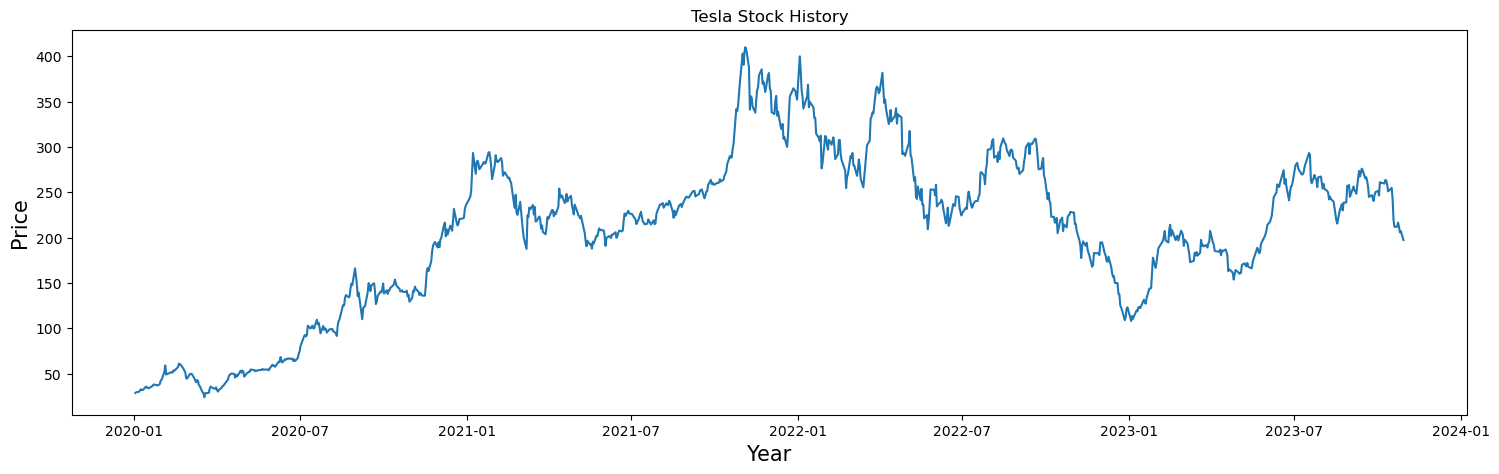

In [11]:
# Plotting the data with years on the x-axis and price on the y-axis
plt.figure(figsize=(18,5))                          # Setting the size of the plot
plt.title('Tesla Stock History')                    # Title of the plot
plt.plot(tesla_df['Date'], tesla_df['Close'])       # Plotting the data (Closing price is what we want)
plt.xlabel('Year', fontsize=15)                     # Label on the x-axis
plt.ylabel('Price', fontsize=15)                    # Label on the y-axis
plt.show()                                          # Showing the plot

### Results
- That looks much more concise.
- There are no outliers present in the new boxplot.

The data is now ready to make some prediction models.

# Simple Linear Regression model
- As I've learned, a regression model is a wise choice when it comes to continuous values, such as stock market prices
- First we will try a simple regression model.

In [12]:
# Splitting data into train and test sets
X = np.array(tesla_df.index).reshape(-1, 1)         # Reshaping the data to be used in the model
y = tesla_df['Close']                               # Getting the target variable (Closing price)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    # Using 20% of the data for testing


# For feature scaling
# scaler = StandardScaler().fit(X_train)
# #scaler.transform(...)
# #feature scaling
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Since I am not getting the feature scaling to work properly, I will not use it for now

tesla_df.head()                                     # Printing the first 5 rows of the dataframe

,Date,Open,High,Low,Close,Adj Close,Volume
2394,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2395,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2396,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2397,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2398,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


In [13]:
# Creating a linear regression model
regression = LinearRegression()

# Fitting the model
regression.fit(X_train, y_train)

LinearRegression()

In [14]:
# Creating a function for plotting the prediction against actual (Since I will be using it more than once)
def plot_predictions(dataframe, y, test_dates, y_pred, title="Stock Prices: Actual vs. Predicted"):
    
    # Create the plot
    plt.figure(figsize=(12,6))

    # Plot all actual values
    plt.plot(dataframe['Date'], y, color='blue', label='Actual', alpha=0.5)
    
    # Plot predicted values for test dates
    plt.scatter(test_dates, y_pred, color='red', label='Predicted', alpha=0.7, s=5)

    # Setting labels and title
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()

    # Show the plot
    plt.show()

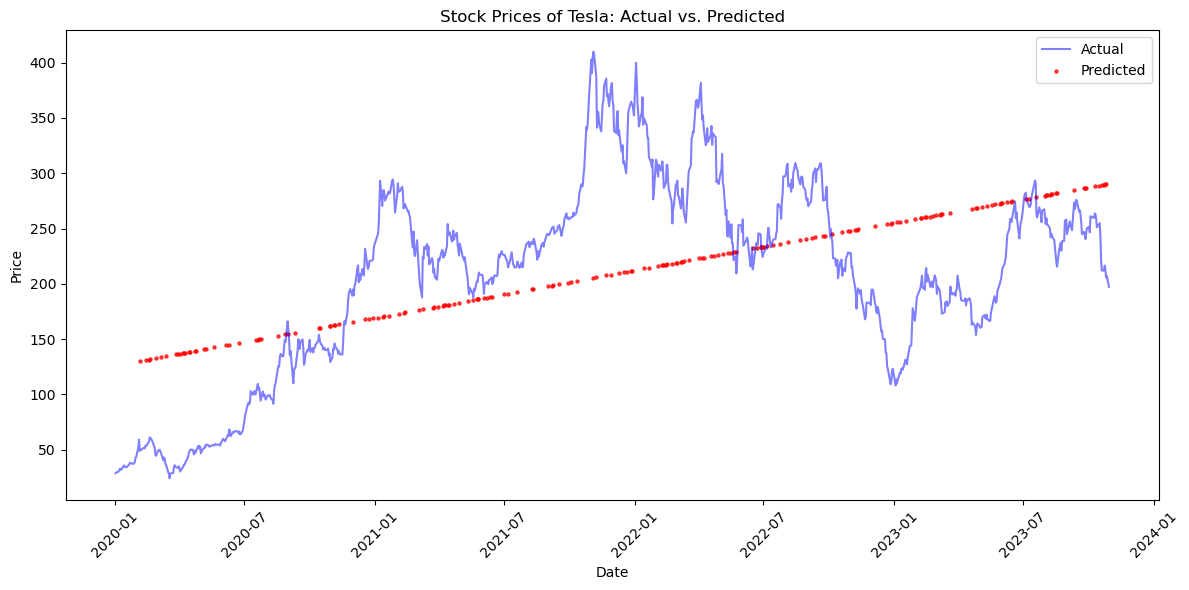

In [15]:
# Getting the predictions
y_pred = regression.predict(X_test)

# Getting the dates for the plot
test_dates = tesla_df.loc[X_test[:, 0], 'Date'].values

# Plotting the predictions
plot_predictions(tesla_df, y, test_dates, y_pred, 'Stock Prices of Tesla: Actual vs. Predicted')

### Analyzing the plot of the Simple Linear regression plot
- As we can see from the plot the predicted values form a line with a slope.
- It does not even try to follow the spikes of the actual stock market prices over time, which is no surprise, since it is a simple linear regression model.
- It only generates a slope that is a somewhat average of all the actuall values.
- Therefore it is not very precise.

### Lets measure how precise it is
We will calculate the following:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R-squared (Coefficient of Determination)
- Mean Absolute Percentage Error (MAPE)

For MAE, MSE, RMSE, and MAPE: We're aiming for values as close to 0 as possible.

For R-squared: We want values closer to 1, indicating a better fit of the model to the data.

In [16]:
# Importing the metrics I will be using
from sklearn.metrics import mean_absolute_error                 # For MAE
from sklearn.metrics import mean_squared_error                  # For MSE
from sklearn.metrics import r2_score                            # For R2

# Creating a function for calculating MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Printing the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 62.73
Mean Squared Error (MSE): 5600.31
Root Mean Squared Error (RMSE): 74.84
R-squared: 0.21
Mean Absolute Percentage Error (MAPE): 47.75%


### Analyzing the metrics of the Linear Regression model
- The model is not precise at all!

# Polynomial Regression model
- Lets try a polynomial regression model, and see if it is a better fit.

In [17]:
# Importing PylynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

In [18]:
# Setting up the polynomial features
poly = PolynomialFeatures(degree=5)             # Setting the degree to 5 (I tried different degrees, and 5 gave me good results)
X_train_poly = poly.fit_transform(X_train)      # Transforming the training data
X_test_poly = poly.fit_transform(X_test)        # Transforming the testing data

In [19]:
# Creating a polynomial regression model
polyregression = LinearRegression()             # Creating the model
polyregression.fit(X_train_poly, y_train)       # Fitting the model

LinearRegression()

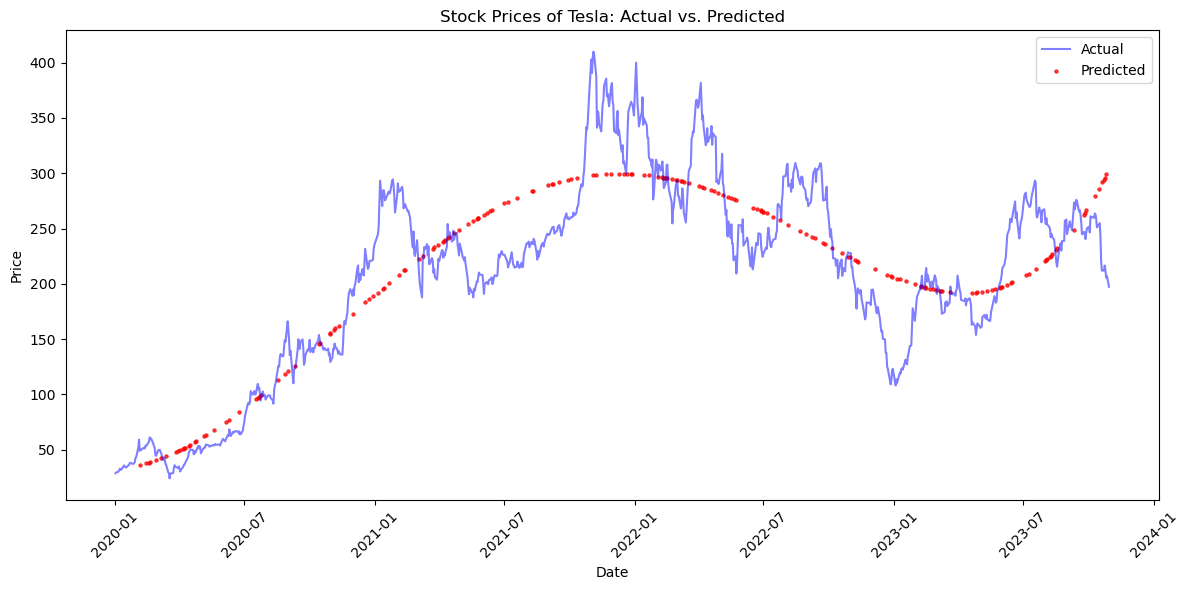

In [20]:
# Getting the predictions
y_pred = polyregression.predict(X_test_poly)

# Plotting the predictions
plot_predictions(tesla_df, y, test_dates, y_pred, 'Stock Prices of Tesla: Actual vs. Predicted')

### Analyzing the plot of the Polynomial Regression plot
- Here the plots create a curvature line which is trying somewhat to follow the trends in the stock market.
- It seems to be much more precise than the linear model.


### Lets measure how precise it is
We will calculate the following:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R-squared (Coefficient of Determination)
- Mean Absolute Percentage Error (MAPE)

For MAE, MSE, RMSE, and MAPE: We're aiming for values as close to 0 as possible.

For R-squared: We want values closer to 1, indicating a better fit of the model to the data.

In [21]:
# Calculating the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Printing the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 32.10
Mean Squared Error (MSE): 1696.63
Root Mean Squared Error (RMSE): 41.19
R-squared: 0.76
Mean Absolute Percentage Error (MAPE): 17.27%


### Analyzing the metrics of the Polynomial Regression model
- It comes as no suprise that the Polynomial model is much more precise than the linear model.
- But there are still potential for improvement.

# Ridge Regression combined with Polynomial Regression
- I've read several articles online that combining Ridge Regression with Polynomial could make it more precise, so that is what I will be trying now.
- When looking back at the other models, we're using all the features of the test set, which might not be ideal, since we then need to use the same amount of features when doing the predictions.
- On that note, I will be trying to use only the Date and the Open market price. 
- This will make it so that the model should be able to predict closing stock market prices based on only the date and the opening market price.

In [22]:
# Importing Ridge
from sklearn.linear_model import Ridge

In [23]:
# Splitting data into train and test sets
X = np.array([tesla_df['Date'], tesla_df['Open']]).T       # Reshaping the data to be used in the model
y = tesla_df['Close']                                      # Getting the target variable (Closing price)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transforming input features
poly = PolynomialFeatures(degree=5)                         # Creating a polynomial object with degree 5
X_train_poly = poly.fit_transform(X_train)                  # Transforming the training data
X_test_poly = poly.fit_transform(X_test)                    # Transforming the testing data
# print(X_test)
# print(X_test_poly)

In [24]:
# Training the Ridge regression model
ridgeRegression = Ridge(alpha=0.1)                          # Creating the model
ridgeRegression.fit(X_train_poly, y_train)                  # Fitting the model

/Users/ingridlunde/anaconda3/envs/dave3625/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=8.21728e-185): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.1)

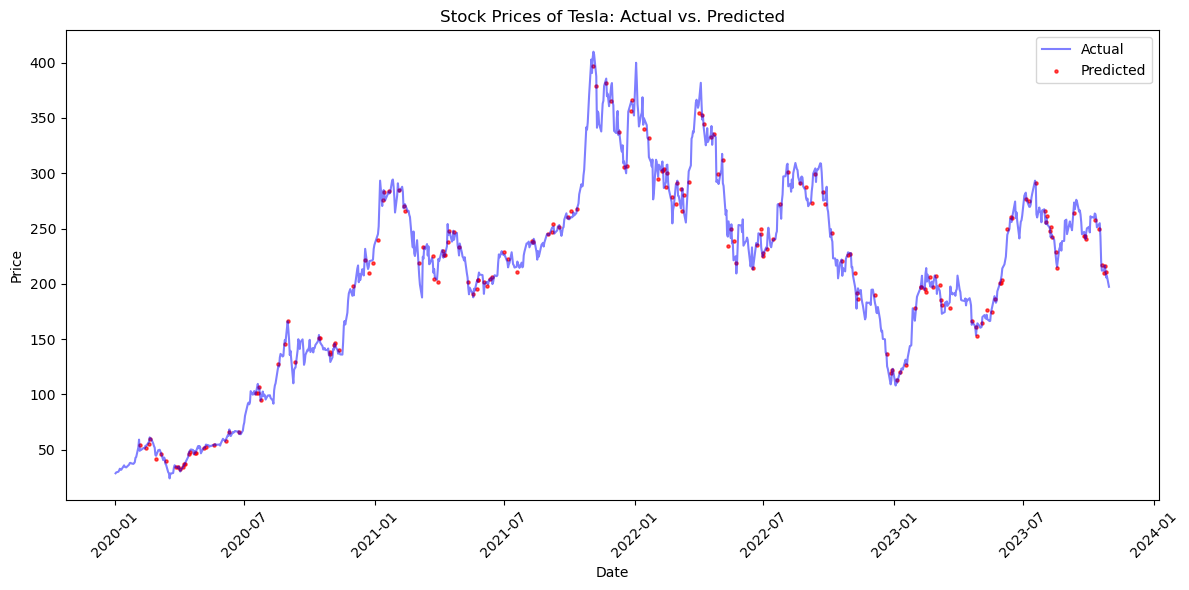

In [25]:
# Getting the predictions
y_pred = ridgeRegression.predict(X_test_poly)

# Convert Unix timestamps in X_test back to datetime objects
test_dates = pd.to_datetime(X_test[:, 0], unit='ns')

# Plot actual vs. predicted stock prices
plot_predictions(tesla_df, y, test_dates, y_pred, 'Stock Prices of Tesla: Actual vs. Predicted')

### Analyzing the plot of the Polynomial Regression plot
- Here the pot seems to try to follow the highs and lows of the actual stock market value.
- If not allways on point, at a glance it looks much more precise than any of the previous models.

### Lets measure how precise it is
We will calculate the following:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R-squared (Coefficient of Determination)
- Mean Absolute Percentage Error (MAPE)

For MAE, MSE, RMSE, and MAPE: We're aiming for values as close to 0 as possible.

For R-squared: We want values closer to 1, indicating a better fit of the model to the data.

In [26]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 4.89
Mean Squared Error (MSE): 43.39
Root Mean Squared Error (RMSE): 6.59
R-squared: 0.99
Mean Absolute Percentage Error (MAPE): 2.49%


### Analyzing the metrics of the Ridge Polynomial regression model
- These metrics are much more precise than the previous models.
- There are still some potential for improvements, but I think this is good enough for this assignment.

## A function to predict the Tesla stock price
- As described in the assignment what follows is a function to predict Teslas stock market prices.
- It only works on historical dates.

In [27]:
# Defining a function for predicting the price for a given date
def predict_and_actual_price_for_date(date, dataframe, poly_transformer, model):
    # Convert the given date to Unix timestamp (in nanoseconds since the Unix epoch)
    date_unix_timestamp = date.timestamp() * 1e9
    
    # Check if date doesn't exists in the dataframe
    if len(dataframe[dataframe['Date'] == date]) == 0:
        return None, None
    
    # Get the 'Open' price for that date
    feature_for_date = dataframe[dataframe['Date'] == date]['Open'].values[0]
    
    # Prepare input data for the model
    input_data = [[date_unix_timestamp, feature_for_date]]
    
    # Apply polynomial transformation
    input_data_poly = poly_transformer.transform(input_data)
    
    # Make prediction
    predicted_price = model.predict(input_data_poly)[0]
    
    # Retrieve the actual price (close price) for that date
    actual_price = dataframe[dataframe['Date'] == date]['Close'].values[0]
    
    # Return the predicted price and actual price
    return predicted_price, actual_price

In [28]:
# Importing datetime
import datetime

# Define the starting date
start_date = datetime.datetime(2020, 5, 1)

# Loop through a range of 30 days
for i in range(30):
    
    # Adding i days to the starting date
    current_date = start_date + datetime.timedelta(days=i)
    
    # Get the predicted and actual price for the current date
    predicted, actual = predict_and_actual_price_for_date(current_date, tesla_df, poly, ridgeRegression)
    
    # Print the results
    if predicted and actual:
        relative_error = (abs(actual - predicted) / actual) * 100
        print(current_date.strftime('%Y-%m-%d'))
        print(f"Predicted Price: {predicted}")
        print(f"Actual Price: {actual}")
        print(f"Relative Error: {relative_error:.2f}%")
        print("-------------------------------")
    else:
        print(f"No data available for date: {current_date.strftime('%Y-%m-%d')}")
        print("-------------------------------")


2020-05-01
Predicted Price: 50.095227610872826
Actual Price: 46.754665
Relative Error: 7.14%
-------------------------------
No data available for date: 2020-05-02
-------------------------------
No data available for date: 2020-05-03
-------------------------------
2020-05-04
Predicted Price: 46.558494772034464
Actual Price: 50.745998
Relative Error: 8.25%
-------------------------------
2020-05-05
Predicted Price: 52.38096752353886
Actual Price: 51.214001
Relative Error: 2.28%
-------------------------------
2020-05-06
Predicted Price: 51.50664233598218
Actual Price: 52.172001
Relative Error: 1.28%
-------------------------------
2020-05-07
Predicted Price: 51.553362519305665
Actual Price: 52.002666
Relative Error: 0.86%
-------------------------------
2020-05-08
Predicted Price: 52.64469156094128
Actual Price: 54.627998
Relative Error: 3.63%
-------------------------------
No data available for date: 2020-05-09
-------------------------------
No data available for date: 2020-05-10
-